## Earthquakes

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv"

equ = pd.read_csv(url)

In [2]:
equ.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


In [3]:
import geopandas as gpd
import os

fp = os.path.join('countries','ne_110m_admin_0_countries.shp')
countries = gpd.read_file(fp)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


In [4]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [5]:
# Filtering for at least mag of 6.5 and year 2014
plot_data = equ[(equ['mag'] >= 6.5) & (equ['time'].str.contains('2014'))]
plot_data.head()

,time,latitude,longitude,depth,mag,id,place,type
9062,2014-01-01 16:03:29.000,-13.8633,167.2490,187.00,6.5,usc000lvb5,"32km W of Sola, Vanuatu",earthquake
12142,2014-02-18 09:27:13.120,14.6682,-58.9272,14.83,6.5,usc000mskt,"172km NNE of Bathsheba, Barbados",earthquake
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.00,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake
15979,2014-02-07 08:40:13.550,-15.0691,167.3721,122.00,6.5,usc000mjye,"34km E of Port-Olry, Vanuatu",earthquake
17606,2014-02-02 09:26:37.820,-32.9076,-177.8806,44.26,6.5,usc000mfm0,"189km SSE of L'Esperance Rock, New Zealand",earthquake


Text(0.1, 0.05, 'Author: Sofia Sarak & Kaiju Morquecho')

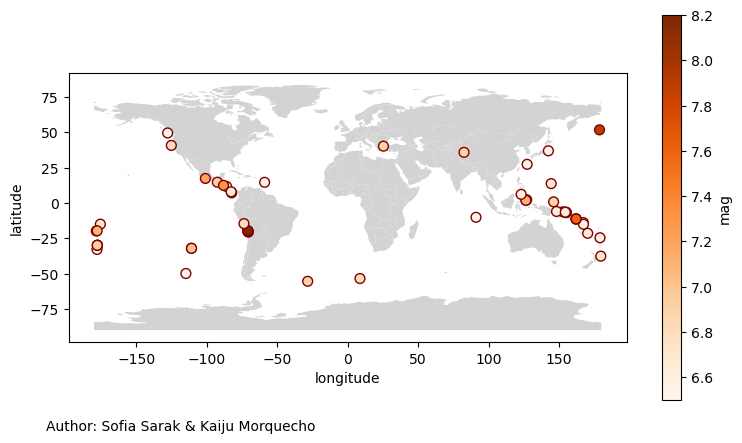

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,5))

countries.plot(ax = ax,
               color = 'lightgray')

plot_data.plot(ax=ax,
              kind = 'scatter',
              column = 'mag',
              x = 'longitude',
              y = 'latitude',
              c = 'mag',
              cmap = 'Oranges', 
              s = 50, 
              edgecolors = "maroon")

plt.figtext(0.1, .05, "Author: Sofia Sarak & Kaiju Morquecho")